In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import pandas_datareader as pdr

In [4]:
import os

In [5]:
from tiingo import TiingoClient

In [6]:
config = {}
config['session'] = True
config['api_key'] = "71f3d380039ddc1625868e92ab212541712c19af"
client = TiingoClient(config)

In [7]:
start = datetime.datetime(2017,1,1) 
end = datetime.datetime(2021,4,1)
startdate = '2020-11-01'
enddate = '2021-04-01'

Tickers

In [8]:
Ticker1 = 'TSLA'
Ticker2 = 'GOOG'
Ticker3 = 'PTON'

Ticker 1

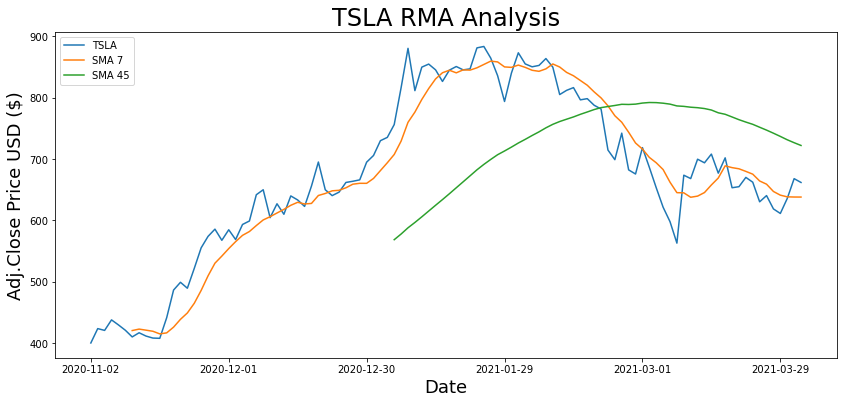

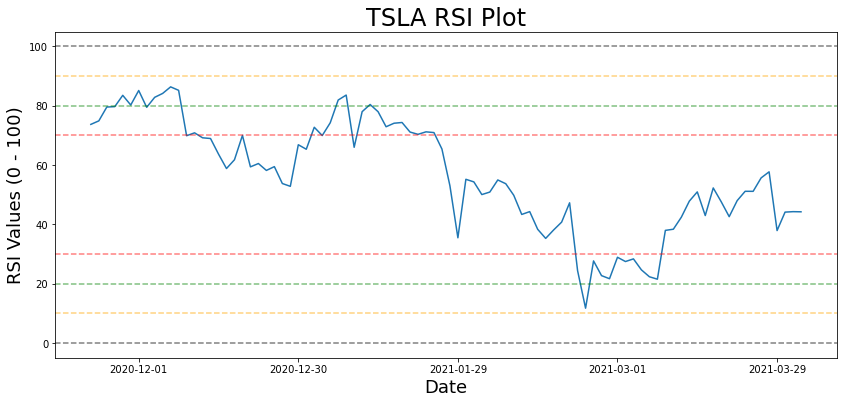

In [9]:
Tick1 = client.get_dataframe(Ticker1,startDate=start,endDate=end).drop(['adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1)
stock_name = [Ticker1]
Tick1 = pd.concat([Tick1],axis=1,keys=stock_name)
Tick1.columns.names = ['Company Name','Stock Info']
Tick1.index = pd.to_datetime(Tick1.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')

delta = Tick1.xs(key=Ticker1,axis=1,level='Company Name')[startdate:enddate]['adjClose'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

time_period = 14

AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())

RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

new_df = pd.DataFrame()

new_df['adjClose'] = Tick1.xs(key=Ticker1,axis=1,level='Company Name')[startdate:enddate]['adjClose']

new_df['RSI'] = RSI

SMA7 = pd.DataFrame()
SMA7['Adj Close Price'] = Tick1.xs(key=Ticker1,axis=1,level='Company Name')[startdate:enddate]['adjClose'].rolling(window=7).mean()

SMA45 = pd.DataFrame()
SMA45['Adj Close Price'] = Tick1.xs(key=Ticker1,axis=1,level='Company Name')[startdate:enddate]['adjClose'].rolling(window=45).mean()

SP = pd.DataFrame()
SP['Adj Close Price'] = Tick1.xs(key=Ticker1,axis=1,level='Company Name')[startdate:enddate]['adjClose']

plt.figure(figsize=(14,6))
SP['Adj Close Price'].plot(label=Ticker1)
SMA7['Adj Close Price'].plot(label='SMA 7')
SMA45['Adj Close Price'].plot(label='SMA 45')
plt.title(Ticker1 +' RMA Analysis',fontsize=24)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj.Close Price USD ($)',fontsize=18)
plt.legend(loc='upper left')

plt.show()

plt.figure(figsize=(14,6))
           
plt.title(Ticker1 + ' RSI Plot',fontsize=24)
           
new_df['RSI'].plot()
 
plt.axhline(0, linestyle='--',alpha=0.5,color='black')

plt.axhline(10, linestyle='--',alpha=0.5,color='orange')  

plt.axhline(20, linestyle='--',alpha=0.5,color='green')  

plt.axhline(30, linestyle='--',alpha=0.5,color='red')  

plt.axhline(70, linestyle='--',alpha=0.5,color='red')  

plt.axhline(80, linestyle='--',alpha=0.5,color='green')  

plt.axhline(90, linestyle='--',alpha=0.5,color='orange')  

plt.axhline(100, linestyle='--',alpha=0.5,color='black')  

plt.xlabel('Date',fontsize=18)

plt.ylabel('RSI Values (0 - 100)',fontsize=18)
  
plt.show()

Ticker 2

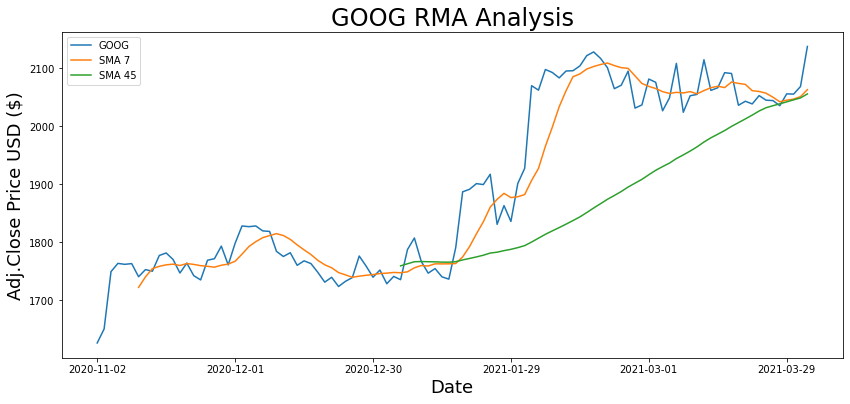

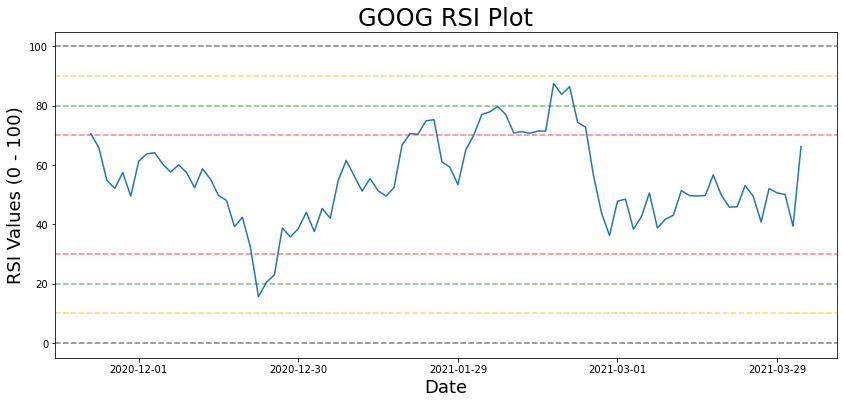

In [10]:
Tick2 = client.get_dataframe(Ticker2,startDate=start,endDate=end).drop(['adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1)
stock_name = [Ticker2]
Tick2 = pd.concat([Tick2],axis=1,keys=stock_name)
Tick2.columns.names = ['Company Name','Stock Info']
Tick2.index = pd.to_datetime(Tick2.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')

delta = Tick2.xs(key=Ticker2,axis=1,level='Company Name')[startdate:enddate]['adjClose'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

time_period = 14

AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())

RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

new_df = pd.DataFrame()

new_df['adjClose'] = Tick2.xs(key=Ticker2,axis=1,level='Company Name')[startdate:enddate]['adjClose']

new_df['RSI'] = RSI

SMA7 = pd.DataFrame()
SMA7['Adj Close Price'] = Tick2.xs(key=Ticker2,axis=1,level='Company Name')[startdate:enddate]['adjClose'].rolling(window=7).mean()

SMA45 = pd.DataFrame()
SMA45['Adj Close Price'] = Tick2.xs(key=Ticker2,axis=1,level='Company Name')[startdate:enddate]['adjClose'].rolling(window=45).mean()

SP = pd.DataFrame()
SP['Adj Close Price'] = Tick2.xs(key=Ticker2,axis=1,level='Company Name')[startdate:enddate]['adjClose']

plt.figure(figsize=(14,6))
SP['Adj Close Price'].plot(label=Ticker2)
SMA7['Adj Close Price'].plot(label='SMA 7')
SMA45['Adj Close Price'].plot(label='SMA 45')
plt.title(Ticker2 +' RMA Analysis',fontsize=24)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj.Close Price USD ($)',fontsize=18)
plt.legend(loc='upper left')

plt.show()

plt.figure(figsize=(14,6))
           
plt.title(Ticker2 + ' RSI Plot',fontsize=24)
           
new_df['RSI'].plot()
 
plt.axhline(0, linestyle='--',alpha=0.5,color='black')

plt.axhline(10, linestyle='--',alpha=0.5,color='orange')  

plt.axhline(20, linestyle='--',alpha=0.5,color='green')  

plt.axhline(30, linestyle='--',alpha=0.5,color='red')  

plt.axhline(70, linestyle='--',alpha=0.5,color='red')  

plt.axhline(80, linestyle='--',alpha=0.5,color='green')  

plt.axhline(90, linestyle='--',alpha=0.5,color='orange')  

plt.axhline(100, linestyle='--',alpha=0.5,color='black')  

plt.xlabel('Date',fontsize=18)

plt.ylabel('RSI Values (0 - 100)',fontsize=18)
  
plt.show()

Ticker 3

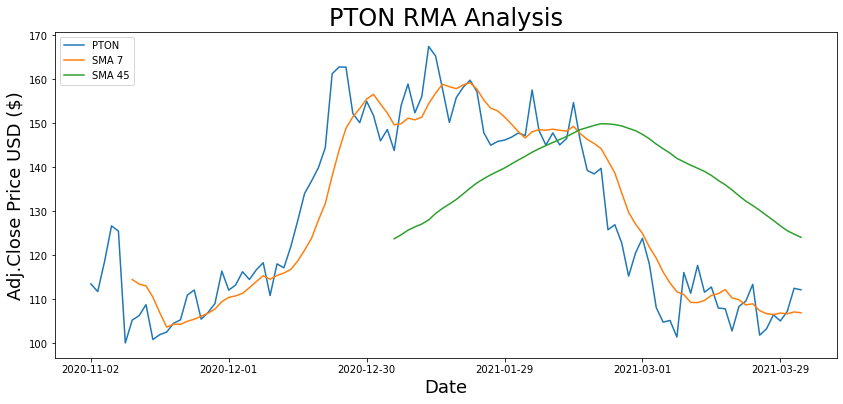

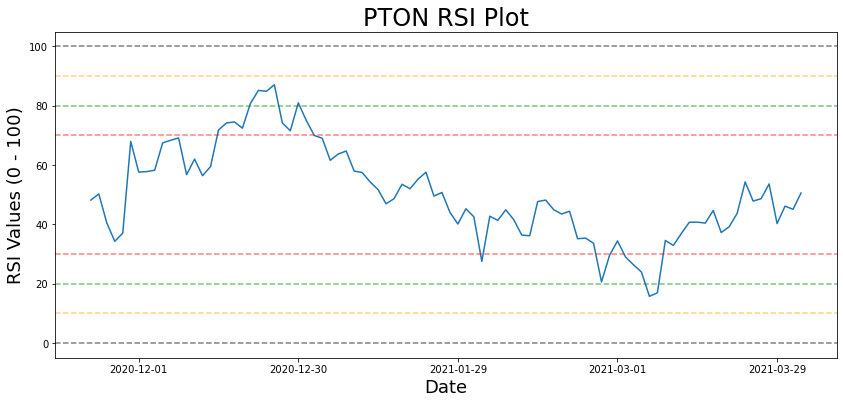

In [11]:
Tick3 = client.get_dataframe(Ticker3,startDate=start,endDate=end).drop(['adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'],axis=1)
stock_name = [Ticker3]
Tick3 = pd.concat([Tick3],axis=1,keys=stock_name)
Tick3.columns.names = ['Company Name','Stock Info']
Tick3.index = pd.to_datetime(Tick3.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')

delta = Tick3.xs(key=Ticker3,axis=1,level='Company Name')[startdate:enddate]['adjClose'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()

up[up<0] = 0
down[down>0] = 0

time_period = 14

AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())

RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

new_df = pd.DataFrame()

new_df['adjClose'] = Tick3.xs(key=Ticker3,axis=1,level='Company Name')[startdate:enddate]['adjClose']

new_df['RSI'] = RSI

SMA7 = pd.DataFrame()
SMA7['Adj Close Price'] = Tick3.xs(key=Ticker3,axis=1,level='Company Name')[startdate:enddate]['adjClose'].rolling(window=7).mean()

SMA45 = pd.DataFrame()
SMA45['Adj Close Price'] = Tick3.xs(key=Ticker3,axis=1,level='Company Name')[startdate:enddate]['adjClose'].rolling(window=45).mean()

SP = pd.DataFrame()
SP['Adj Close Price'] = Tick3.xs(key=Ticker3,axis=1,level='Company Name')[startdate:enddate]['adjClose']

plt.figure(figsize=(14,6))
SP['Adj Close Price'].plot(label=Ticker3)
SMA7['Adj Close Price'].plot(label='SMA 7')
SMA45['Adj Close Price'].plot(label='SMA 45')
plt.title(Ticker3 +' RMA Analysis',fontsize=24)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj.Close Price USD ($)',fontsize=18)
plt.legend(loc='upper left')

plt.show()

plt.figure(figsize=(14,6))
           
plt.title(Ticker3 + ' RSI Plot',fontsize=24)
           
new_df['RSI'].plot()
 
plt.axhline(0, linestyle='--',alpha=0.5,color='black')

plt.axhline(10, linestyle='--',alpha=0.5,color='orange')  

plt.axhline(20, linestyle='--',alpha=0.5,color='green')  

plt.axhline(30, linestyle='--',alpha=0.5,color='red')  

plt.axhline(70, linestyle='--',alpha=0.5,color='red')  

plt.axhline(80, linestyle='--',alpha=0.5,color='green')  

plt.axhline(90, linestyle='--',alpha=0.5,color='orange')  

plt.axhline(100, linestyle='--',alpha=0.5,color='black')  

plt.xlabel('Date',fontsize=18)

plt.ylabel('RSI Values (0 - 100)',fontsize=18)
  
plt.show()